In [4]:
import numpy as np

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

In [8]:
import yfinance as yf

# Define the start and end dates
start = '2010-01-01'
end = '2024-01-01'

# Retrieve stock data for AAPL from Yahoo Finance
df = yf.download('AAPL', start=start, end=end)

# Display the first few rows of the data
print(df.head())


[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454506  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362819  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351055  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848206,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802170,42628800


In [10]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351055,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [14]:
df=df.drop(['Date', 'Adj Close'], axis=1)


In [16]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


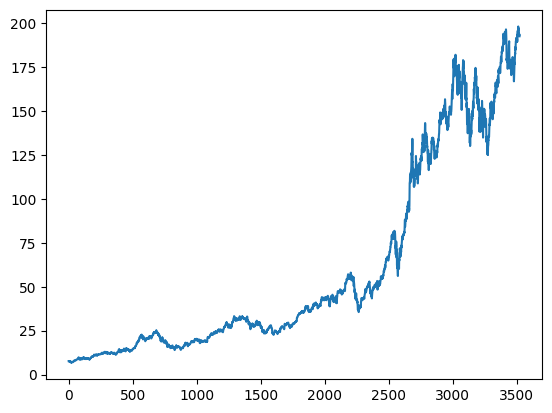

In [18]:
plt.plot(df.Close)

In [20]:
ma100=df.Close.rolling(100).mean()

In [22]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

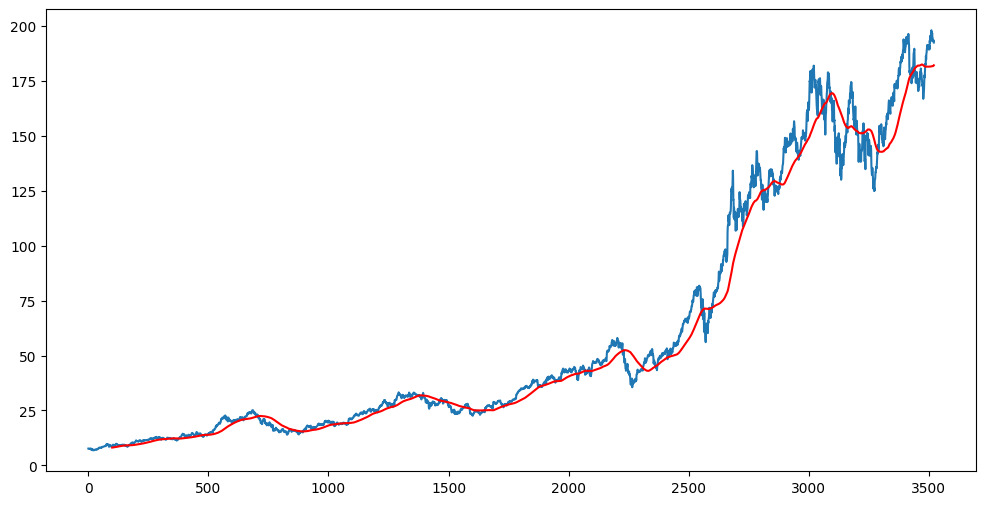

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [26]:
ma200=df.Close.rolling(200).mean()

In [28]:
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

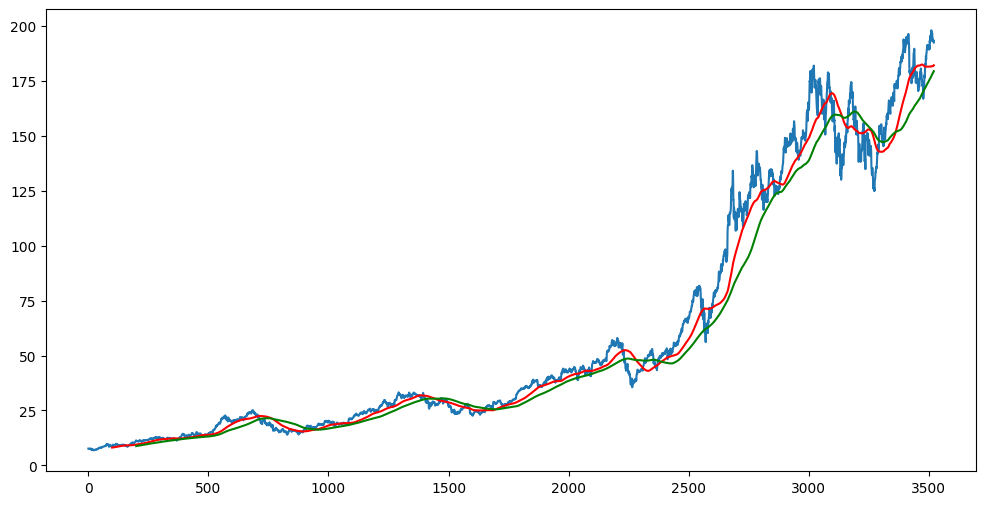

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [32]:
df.shape

(3522, 5)

In [34]:
# splitting data into train and test

In [36]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

In [38]:
print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [40]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [44]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [54]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [56]:
data_training_array.shape

(2465, 1)

In [60]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)

In [68]:
x_train.shape

(2365, 100, 1)

In [62]:
# ML Model 

In [66]:
from keras.layers import Dense , Dropout, LSTM
from keras.models import Sequential

In [70]:
model=Sequential()
model.add(LSTM(units=50 , activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 , activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\avnis\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - loss: 0.0627
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0079
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - loss: 0.0072
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 238ms/step - loss: 0.0060
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - loss: 0.0057
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - loss: 0.0055
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0049
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - loss: 0.0048
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - loss: 0.0046
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - loss: 0.0039
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 238ms/step - loss: 0.0037
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - loss: 0.0040
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - loss: 0.0035
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - loss: 0.0041
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [78]:
model.save('Stock_price_prediction_keras_LSTM_model.h5')

In [80]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [84]:
data_training.tail(100)

,Close
2365,44.345001
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
...,...
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499


In [86]:
past_100_days=data_training.tail(100)

In [90]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [92]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [94]:
input_data=scaler.fit_transform(final_df)

In [96]:
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [98]:
input_data.shape

(1157, 1)

In [116]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [124]:
x_test, y_test=np.array(x_test), np.array(y_test)
print (x_test.shape)
print (y_test.shape)

(1057, 100, 1)
(1057,)


In [126]:
# making prediction

In [128]:
y_predict=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [130]:
y_predict.shape

(1057, 1)

In [132]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [134]:
y_predict

array([[0.12358204],
       [0.12487473],
       [0.12621056],
       ...,
       [0.924806  ],
       [0.92167294],
       [0.91808903]], dtype=float32)

In [136]:
scaler.scale_

array([0.00646057])

In [138]:
scale_factor=1/0.00646057
y_predicted=y_predict*scale_factor
y_test=y_test*scale_factor

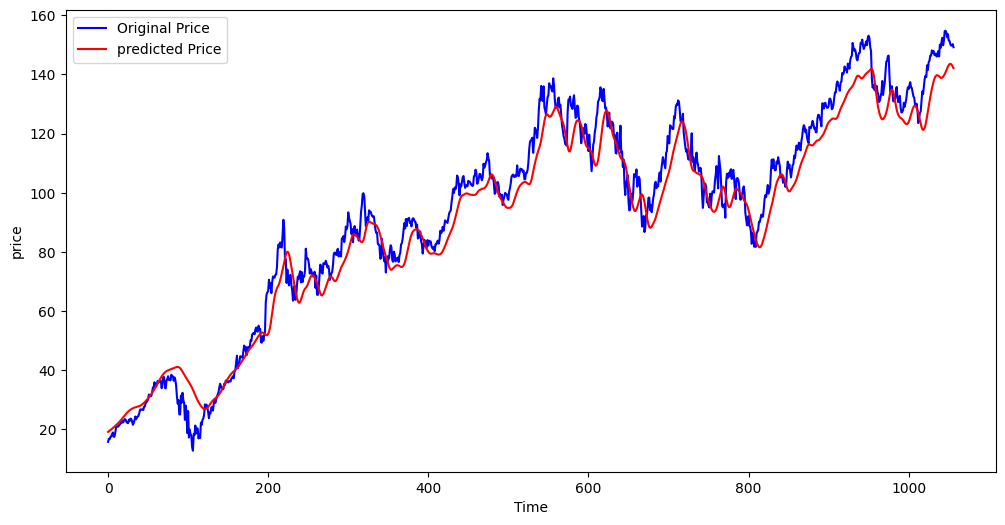

In [140]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label='Original Price')
plt.plot(y_predicted, 'r', label='predicted Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()